**CONTENTS**

instructions

import libraries, drive, df

initial checks

security implications

create region column

Region vs Spending

Eliminate low-ordering customers

Creating profiles

Visualise profiles

Quality check on customer data

Examine profiles continued

Compare profiles to region and departments

Export new dataframe


**Instructions**

In [1]:
## all the instructions for the task


## Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
# The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
# •	Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
# •	Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
# Create an appropriate visualization to show the distribution of profiles.
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
# Produce suitable charts to illustrate your results and export them in your project folder.
# Tidy up your script, export your final data set, and save your notebook.



In [2]:
## -- Loading Libraries --
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Importing google drive#

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importing the most recent df - the one created in 4.9 part 1 - from drive#
#REMEMBER this is a subset of the whole data - 1 million rows

df = pd.read_pickle('/content/drive/MyDrive/4.9_merged_clean.pkl')

**Initial Checks**

In [5]:
#checking I'm importing what I think I am

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,Family_Name,Gender,State,Age,date_joined,number_dependents,family_circumstance,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,2907475,96682,prior,23,4,...,Regular customer,Bond,Female,Mississippi,71,1/8/2018,2,married,37754,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,3038506,39081,prior,16,2,...,Regular customer,Sosa,Female,Indiana,60,1/16/2017,1,married,143885,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,3185203,95847,prior,49,1,...,Frequent customer,Douglas,Male,Kentucky,27,8/24/2018,3,married,98288,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1830804,14910,prior,56,4,...,Frequent customer,Valdez,Male,Kentucky,67,6/18/2019,0,divorced/widowed,39625,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Regular customer,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both


In [6]:
#checking for 'new customers'

df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_days', 'busiest_time',
       'max_order', 'loyalty_flag', 'average_order', 'spending_flag',
       'order_frequency', 'frequency_flag', 'Family_Name', 'Gender', 'State',
       'Age', 'date_joined', 'number_dependents', 'family_circumstance',
       'income', '_merge'],
      dtype='object')

In [7]:
# I think 'new customers can be found in 'loyalty_flag' so will look at that

df['loyalty_flag'].head(20)

,loyalty_flag
0,Regular customer
1,Regular customer
2,Loyal customer
3,Loyal customer
4,Regular customer
5,Loyal customer
6,New customer
7,Regular customer
8,Regular customer
9,Loyal customer


**Security implications**



There are no contact or payment details for customers so that is one aspect we don't need to consider

Although - having excluded 'Given Name' as a column -  we cannot directly identify any individuals, the combination of sata here, means we could.

If we combine Family Name / Gender / Age etc, it would be possible to identify individuals, and then their shopiing habits and personal circumstances. We therefore need to vigilant with how we use this data.

[We note for the purposes of this exercises that the PII included is not actual data]

**Create Region Column**

In [8]:
#Need to create a 'Region' column based on the 'States' column, so useful to get a data dictionary of the 'States' column first

state_data_dict = df['State'].to_dict()

In [9]:
#Checking  - and looks right
state_data_dict

{0: 'Mississippi',
 1: 'Indiana',
 2: 'Kentucky',
 3: 'Kentucky',
 4: 'Hawaii',
 5: 'Tennessee',
 6: 'Iowa',
 7: 'Oklahoma',
 8: 'Arkansas',
 9: 'Delaware',
 10: 'Ohio',
 11: 'Massachusetts',
 12: 'Vermont',
 13: 'Virginia',
 14: 'West Virginia',
 15: 'Oregon',
 16: 'Arkansas',
 17: 'Texas',
 18: 'Hawaii',
 19: 'Wyoming',
 20: 'New York',
 21: 'Oregon',
 22: 'Arizona',
 23: 'Michigan',
 24: 'New Mexico',
 25: 'Nevada',
 26: 'New York',
 27: 'Delaware',
 28: 'Mississippi',
 29: 'Alabama',
 30: 'District of Columbia',
 31: 'Louisiana',
 32: 'Florida',
 33: 'Connecticut',
 34: 'Oregon',
 35: 'Illinois',
 36: 'Maryland',
 37: 'Mississippi',
 38: 'Delaware',
 39: 'Nevada',
 40: 'District of Columbia',
 41: 'New Mexico',
 42: 'South Carolina',
 43: 'Colorado',
 44: 'Maryland',
 45: 'New Hampshire',
 46: 'Alabama',
 47: 'Virginia',
 48: 'Tennessee',
 49: 'Louisiana',
 50: 'Florida',
 51: 'Michigan',
 52: 'Louisiana',
 53: 'Wisconsin',
 54: 'New Jersey',
 55: 'Michigan',
 56: 'Illinois',
 57: 

In [10]:
# Getting the unique values

unique_values = set(state_data_dict.values())
print(unique_values)


{'Vermont', 'Idaho', 'Missouri', 'Colorado', 'North Carolina', 'Nebraska', 'New York', 'New Hampshire', 'California', 'West Virginia', 'Massachusetts', 'Kansas', 'Oklahoma', 'New Jersey', 'Pennsylvania', 'Florida', 'Nevada', 'South Dakota', 'North Dakota', 'Utah', 'Minnesota', 'New Mexico', 'Montana', 'Kentucky', 'Washington', 'Alaska', 'South Carolina', 'Mississippi', 'Arkansas', 'Tennessee', 'Rhode Island', 'Michigan', 'Virginia', 'Wisconsin', 'Alabama', 'Texas', 'Louisiana', 'Oregon', 'Maine', 'Hawaii', 'Georgia', 'Wyoming', 'Connecticut', 'Indiana', 'Iowa', 'Illinois', 'Ohio', 'Delaware', 'Maryland', 'Arizona', 'District of Columbia'}


Took into Excel to create this list:

Midwest =  'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'
Northeast =  'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'
South =  'Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'
West =  'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana','Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'


In [11]:
# Define state to region mapping

state_to_region = {
    'Alaska': 'West', 'Arizona': 'West', 'California': 'West', 'Colorado': 'West', 'Hawaii': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Oregon': 'West', 'Utah': 'West', 'Washington': 'West', 'Wyoming': 'West',
    'Alabama': 'South', 'Arkansas': 'South', 'Delaware': 'South', 'District of Columbia': 'South', 'Florida': 'South', 'Georgia': 'South', 'Kentucky': 'South', 'Louisiana': 'South', 'Maryland': 'South', 'Mississippi': 'South', 'North Carolina': 'South', 'Oklahoma': 'South', 'South Carolina': 'South', 'Tennessee': 'South', 'Texas': 'South', 'Virginia': 'South', 'West Virginia': 'South',
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest'
}

In [12]:
#Create the new column 'Region' with the instruction of what state = what region

df['Region'] = df['State'].map(state_to_region)

That was a bit difficult to set up the mapping. Could have done with loc instead:

df.loc[df['State'].isin(['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana','Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']), 'Region'] = 'West'

I would do it this way in future.

In [13]:
#checking this looks correct - it does!

df[['Region','State']].head(20)

,Region,State
0,South,Mississippi
1,Midwest,Indiana
2,South,Kentucky
3,South,Kentucky
4,West,Hawaii
5,South,Tennessee
6,Midwest,Iowa
7,South,Oklahoma
8,South,Arkansas
9,South,Delaware


**Region vs Spending**

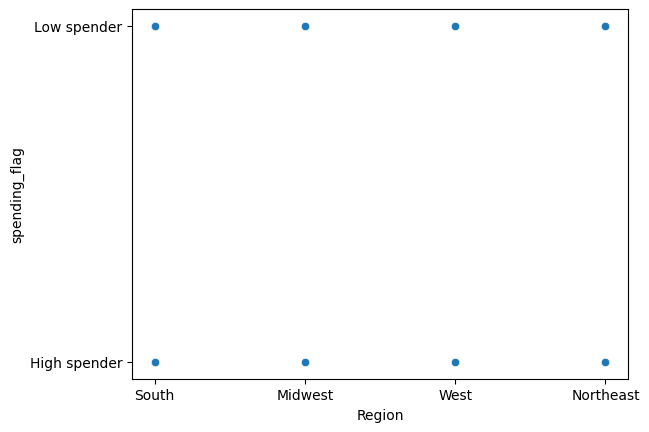

In [14]:
#Seeing if there is a correlation between region and spending using a scatterplot

#this doesn't show very much - need the actual values

scatter_region_spend= sns.scatterplot(x = 'Region', y = 'spending_flag',data = df)

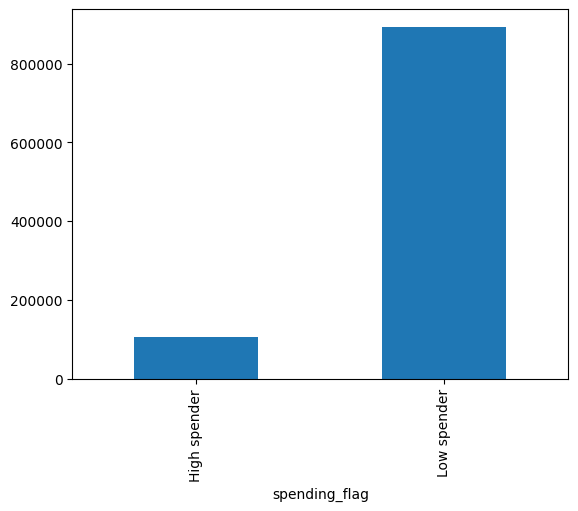

In [15]:
#I can do a histogram of all of the different types of spenders

hist_spend = df['spending_flag'].value_counts().sort_index().plot.bar()

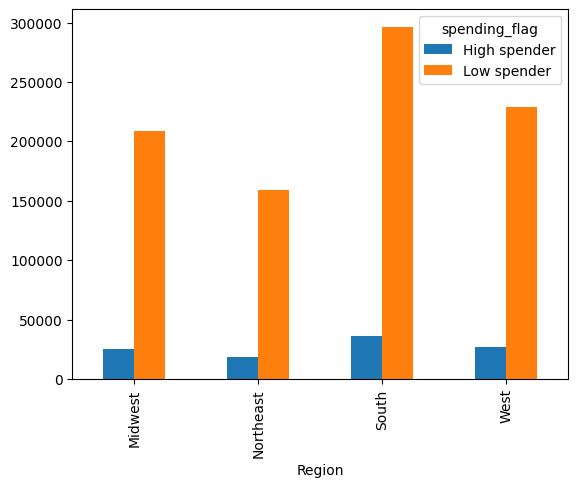

In [16]:
# And then show that by region

hist_spend_region = df.groupby('Region')['spending_flag'].value_counts().unstack().plot.bar()

So, we can see that Midwest and West look similar

There are fewer customers win the NorthEast but a greater proportion are high spenders

There are most customers in the South and the greatest proportion of low spenders

**Eliminate low-odredring customers**

INSTRUCTION REMINDER: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample (export is at the very end of the notebook).

In [17]:
#First we need to group by the customers, and then see how many orders they have placed

df.groupby('user_id')['order_number'].max()


,order_number
user_id,
1,5
10,5
1000,4
10000,68
100000,9
...,...
99993,6
99994,11
99996,11


So now, we can see the number of orders each customer places

In [18]:
#We ALREADY have a column 'Max Order' created in 4.8

#Remind myself of this

df[['user_id', 'max_order']].head()

,user_id,max_order
0,96682,23
1,39081,29
2,95847,93
3,14910,56
4,777,25


In [19]:
#Also already have a have a 'loyalty_flag' column  created in 4.8

#Remind myself of this

df[['user_id', 'max_order', 'loyalty_flag']].head(20)

,user_id,max_order,loyalty_flag
0,96682,23,Regular customer
1,39081,29,Regular customer
2,95847,93,Loyal customer
3,14910,56,Loyal customer
4,777,25,Regular customer
5,146872,98,Loyal customer
6,30310,7,New customer
7,125644,11,Regular customer
8,84766,40,Regular customer
9,159791,94,Loyal customer


A "new customer" is defined as under or equal to 10 orders. Can split that into New = 5-9 and Very New = 1-4

In [20]:
df.loc[df['max_order'] < 5, 'loyalty_flag'] = 'Very new customer'

In [21]:
#Having a look at that - has been successful

df[['user_id', 'max_order', 'loyalty_flag']].head(50)

,user_id,max_order,loyalty_flag
0,96682,23,Regular customer
1,39081,29,Regular customer
2,95847,93,Loyal customer
3,14910,56,Loyal customer
4,777,25,Regular customer
5,146872,98,Loyal customer
6,30310,7,New customer
7,125644,11,Regular customer
8,84766,40,Regular customer
9,159791,94,Loyal customer


In [22]:
#checking the sum of the loyalty flags adds up to 1 million

df['loyalty_flag'].value_counts(dropna = False).sum()


np.int64(1000000)

In [23]:
#Creating a subset of the data that excludes Very New Customers
#i.e. it INcludes the other three types:

#HAD TO COME BACK AND MAKE THIS A COPY NOT A VIEW, AS WAS CAUSING ISSUES DOWN THE LINE

df_goodcusts = df[df['loyalty_flag'] != 'Very new customer'].copy()

In [24]:
df_goodcusts.shape

(918370, 33)

In [25]:
#Checking the new and old dfs
#checking how many of each type of customer this produces

df['loyalty_flag'].value_counts(dropna = False)


,count
loyalty_flag,
Regular customer,469176
Loyal customer,293248
New customer,155946
Very new customer,81630


In [26]:
df_goodcusts['loyalty_flag'].value_counts(dropna = False)

,count
loyalty_flag,
Regular customer,469176
Loyal customer,293248
New customer,155946


So, we've just excluded the Very new customers - as intended

**Creating profiles**

INSTRUCTION REMINDER: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [27]:
#So I'm going to create three profiles
#'Rich Retirees' they are over 60, have a high income
# 'Multiple_Mom', women under 40 with more than one child
# 'Young_and_free', people under 25, with no dependents, and at least a median income



In [28]:
#So start with a new variable 'Customer_Profile'
#Getting the process right, just starting with age



Customer_Profile = []

for value in df_goodcusts['Age']:
    if value >= 60:
        Customer_Profile.append('Rich_Retiree')


In [29]:
#reminder of what 'income' looks like

df_goodcusts['income'].describe()

,income
count,918370.000000
mean,99537.977587
std,43479.950207
min,25911.000000
25%,66953.000000
50%,96648.500000
75%,127983.000000
max,593901.000000


In [30]:
#Now can I do age and income?

#I first needed help from Co-pilot to try and set up mutiple criteria for a profile, then Gemini stepped in to add the iterrows (needed because this is a subset of the original data frame)
#I was only trying to do rich retirees, but Gemini then stepped in with suggestions for other profiles too.

Customer_Profile = []

for index, row in df_goodcusts.iterrows():
    age = row['Age']
    income = row['income']
    dependents = row['number_dependents']
    gender = row['Gender']

    if age >= 60 and income >= 127983:
        Customer_Profile.append('Rich_Retiree')
    elif gender == 'Female' and age < 40 and dependents > 1:
        Customer_Profile.append('Multiple_Mom')
    elif age < 25 and dependents == 0 and income >= 99537:
        Customer_Profile.append('Young_and_free')
    else:
        Customer_Profile.append('Other') # Categorize customers who don't fit into the specific profiles

In [31]:
#Populating a new column with our new variable

df_goodcusts['Profile'] = Customer_Profile

In [32]:
#Examine numbers of our new profiles

df_goodcusts['Profile'].value_counts(dropna = False)

,count
Profile,
Other,719620
Rich_Retiree,119907
Multiple_Mom,77807
Young_and_free,1036


So, quite variable numbers and young and free is very small. Going to run again, but up the age to 30

In [33]:
Customer_Profile = []

for index, row in df_goodcusts.iterrows():
    age = row['Age']
    income = row['income']
    dependents = row['number_dependents']
    gender = row['Gender']

    if age >= 60 and income >= 127983:
        Customer_Profile.append('Rich_Retiree')
    elif gender == 'Female' and age < 40 and dependents > 1:
        Customer_Profile.append('Multiple_Mom')
    elif age < 30 and dependents == 0 and income >= 66953:
        Customer_Profile.append('Young_and_free')
    else:
        Customer_Profile.append('Other') # Categorize customers who don't fit into the specific profiles

In [34]:
#Populating a new column with our new variable

df_goodcusts['Profile'] = Customer_Profile

In [35]:
#Examine numbers of our new profiles

df_goodcusts['Profile'].value_counts(dropna = False)

,count
Profile,
Other,697328
Rich_Retiree,119907
Multiple_Mom,77807
Young_and_free,23328


Young and free still small, so take income down to top of first quartile

In [36]:
#Tried doing just for the Young and Free Profile - didn't work, so doing for all at once again.

Customer_Profile = []

for index, row in df_goodcusts.iterrows():
    age = row['Age']
    income = row['income']
    dependents = row['number_dependents']
    gender = row['Gender']

    if age >= 60 and income >= 127983:
        Customer_Profile.append('Rich_Retiree')
    elif gender == 'Female' and age < 40 and dependents > 1:
        Customer_Profile.append('Multiple_Mom')
    elif age < 30 and dependents == 0 and income >= 66953:
        Customer_Profile.append('Young_and_free')
    else:
        Customer_Profile.append('Other') # Categorize customers who don't fit into the specific profiles

In [37]:
#Populating a new column with our new variable

df_goodcusts['Profile'] = Customer_Profile

In [38]:
#Examine numbers of our new profiles

df_goodcusts['Profile'].value_counts(dropna = False)

,count
Profile,
Other,697328
Rich_Retiree,119907
Multiple_Mom,77807
Young_and_free,23328


More useful splits, so will work with these.

**Visualise profiles**

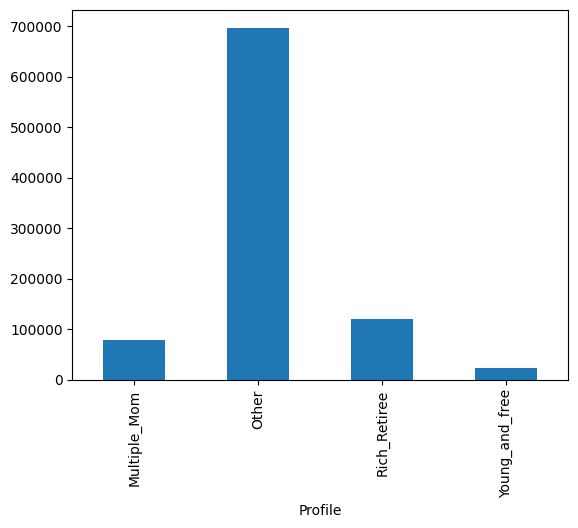

In [39]:
# INSTRUCTION REMINDER: Create an appropriate visualization to show the distribution of profiles.

#A histogram of all of the different profiles

hist_profile = df_goodcusts['Profile'].value_counts().sort_index().plot.bar()

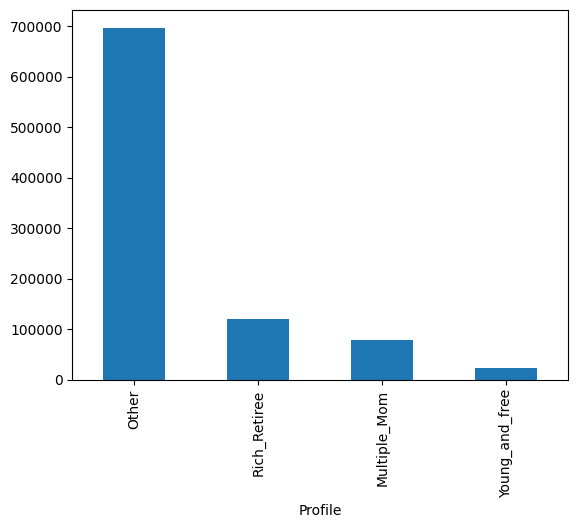

In [40]:
# Create a bar chart from the “Profile” column  - this sorts high to low

bar_profile = df_goodcusts['Profile'].value_counts().plot.bar()

Can see very visually, that we would need to create more profiles - but doesn't mean these aren't useful

INSTRUCTION REMINDER: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [41]:
#First we need to group by Profile, and then look at usage

#Can do multiple aggregations at once

df_goodcusts.groupby('Profile').agg({'order_number': ['mean', 'min', 'max']})


order_number        
                       mean min max
Profile                            
Multiple_Mom      18.319341   1  99
Other             18.506450   1  99
Rich_Retiree      18.808552   1  99
Young_and_free    18.356653   1  99

I don't think this means what I think it means!

We shouldnlt have any customers with one order anymore.

**Quality check customer data**

In [42]:
df_goodcusts[['order_number', 'max_order']].head(50)

,order_number,max_order
0,23,23
1,16,29
2,49,93
3,56,56
4,16,25
5,61,98
6,7,7
7,11,11
8,40,40
9,17,94


This helps me to understand.

So, on any one line, you can see the nth order that customer has placed. That may be <5, but we have excluded any customers - in 'max_order' where they place less than 5 in total.

In [43]:
#Do on max_order instead

#First we need to group by Profile, and then look number of orders

#Can do multiple aggregations at once

df_goodcusts.groupby('Profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                     mean min max
Profile                          
Multiple_Mom    33.073567   5  99
Other           33.381630   5  99
Rich_Retiree    33.982170   5  99
Young_and_free  33.445259   5  99

So - we see they have similar mean number of orders.

**Examine profiles continued**

In [44]:
#Do on max_order instead

#First we need to group by Profile, and then look at expenditure

#Can do multiple aggregations at once

df_goodcusts.groupby('Profile').agg({'average_order': ['mean', 'min', 'max']})

average_order           
                        mean  min   max
Profile                                
Multiple_Mom        7.678490  1.0  25.0
Other               7.658343  1.0  25.0
Rich_Retiree        7.848780  1.0  25.0
Young_and_free      7.834049  1.1  23.2

All of these profiles have an average order greater than everyone else - especially for Rich Retiree and Young and Free - these could be profiles worth trying to sell more to

**Compare profiles to regions and departments**

INSTRUCTION REMINDER: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [45]:
# Create a table that show average spend (average of 'average_order') by 'Region'  and 'Profile'

df_goodcusts.groupby(['Region', 'Profile']).agg({'average_order': ['mean']})

average_order
                                  mean
Region    Profile                     
Midwest   Multiple_Mom        7.693316
          Other               7.671160
          Rich_Retiree        7.812981
          Young_and_free      7.887131
Northeast Multiple_Mom        7.642209
          Other               7.655700
          Rich_Retiree        7.923190
          Young_and_free      7.720143
South     Multiple_Mom        7.688666
          Other               7.658949
          Rich_Retiree        7.871678
          Young_and_free      7.830619
West      Multiple_Mom        7.675921
          Other               7.647729
          Rich_Retiree        7.798417
          Young_and_free      7.871542

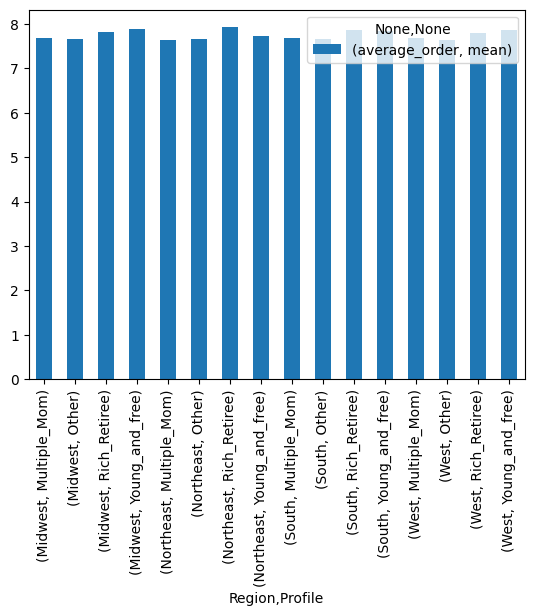

In [72]:
#What does look like as a bar chart?

bar_region_profile = df_goodcusts.groupby(['Region', 'Profile']).agg({'average_order': ['mean']}).plot.bar()

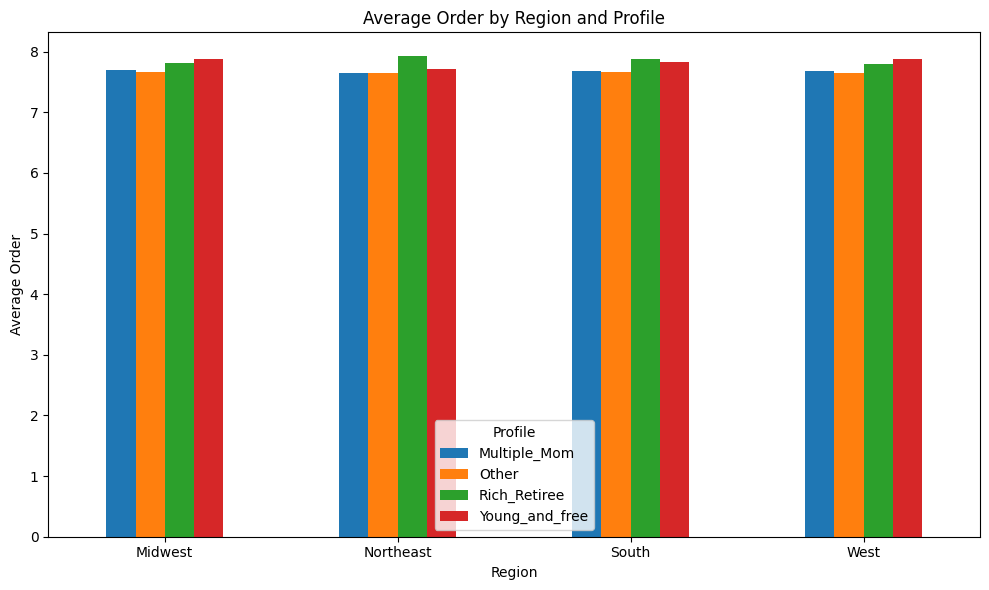

In [47]:
#That isn't very useful, so got ChatGPT to help here:

# Group and reshape
bar_region_profile = (
    df_goodcusts
    .groupby(['Region', 'Profile'])['average_order']
    .mean()
    .unstack('Profile')   # Make Profile into columns
)

# Plot
ax = bar_region_profile.plot(
    kind='bar',
    figsize=(10,6)
)

# Beautify
plt.title("Average Order by Region and Profile")
plt.ylabel("Average Order")
plt.xlabel("Region")
plt.legend(title="Profile")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

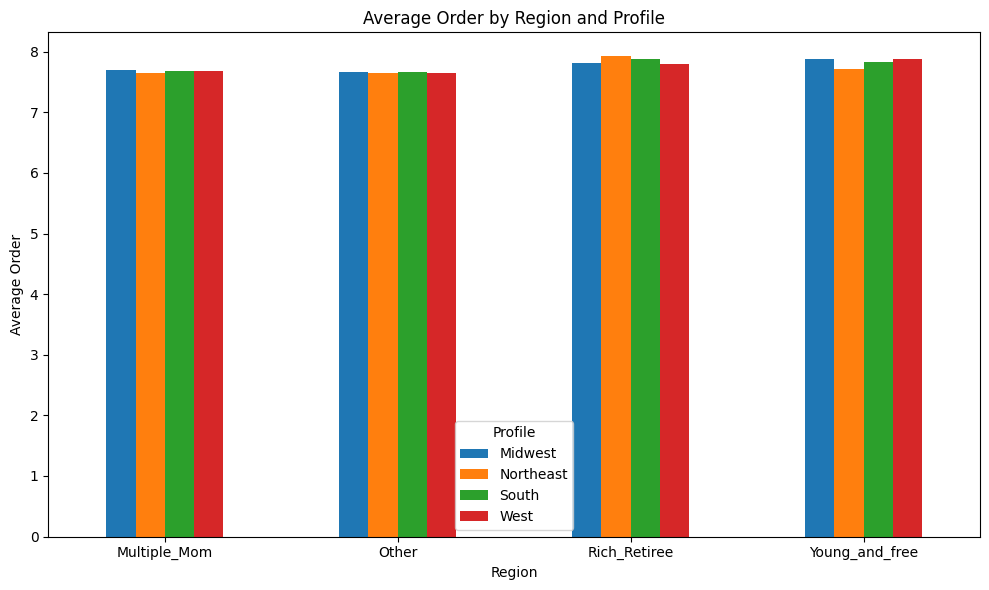

In [48]:
#Now the other way round

# Group and reshape
bar_region_profile = (
    df_goodcusts
    .groupby(['Profile', 'Region'])['average_order']
    .mean()
    .unstack('Region')   # Make Profile into columns
)

# Plot
ax = bar_region_profile.plot(
    kind='bar',
    figsize=(10,6)
)

# Beautify
plt.title("Average Order by Region and Profile")
plt.ylabel("Average Order")
plt.xlabel("Region")
plt.legend(title="Profile")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

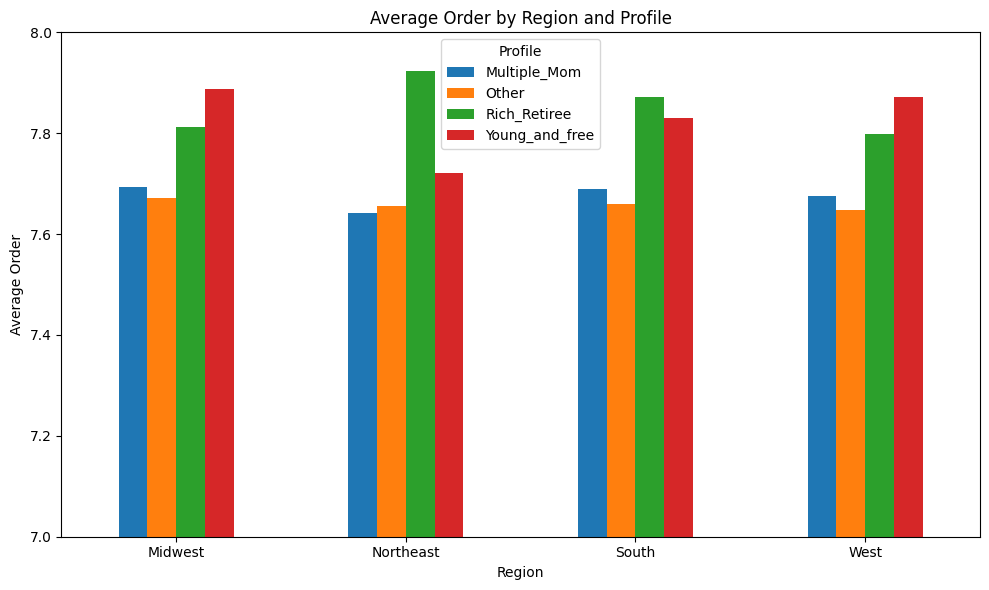

In [54]:
#First version is better, now show values from 7-8 to highlight differences. Again with ChatGPT help

# Group and reshape
bar_region_profile = (
    df_goodcusts
    .groupby(['Region', 'Profile'])['average_order']
    .mean()
    .unstack('Profile')   # Make Profile into columns
)

# Plot
ax = bar_region_profile.plot(
    kind='bar',
    figsize=(10,6)
)

# Beautify
plt.title("Average Order by Region and Profile")
plt.ylabel("Average Order")
plt.xlabel("Region")
plt.legend(title="Profile")
plt.xticks(rotation=0)

# Force y-axis range
plt.ylim(7, 8)

plt.tight_layout()
plt.show()



In [55]:
# Save to a specific folder in Drive
plt.savefig('/content/drive/My Drive/bar_region_profile.png')


<Figure size 640x480 with 0 Axes>

In [57]:
#Look at profiles by department

#First a reminder on what departments look like

df_goodcusts['department_id'].value_counts()

,count
department_id,
4,232002
16,150376
19,87691
7,82527
1,69356
13,56227
15,36229
3,35045
9,26265


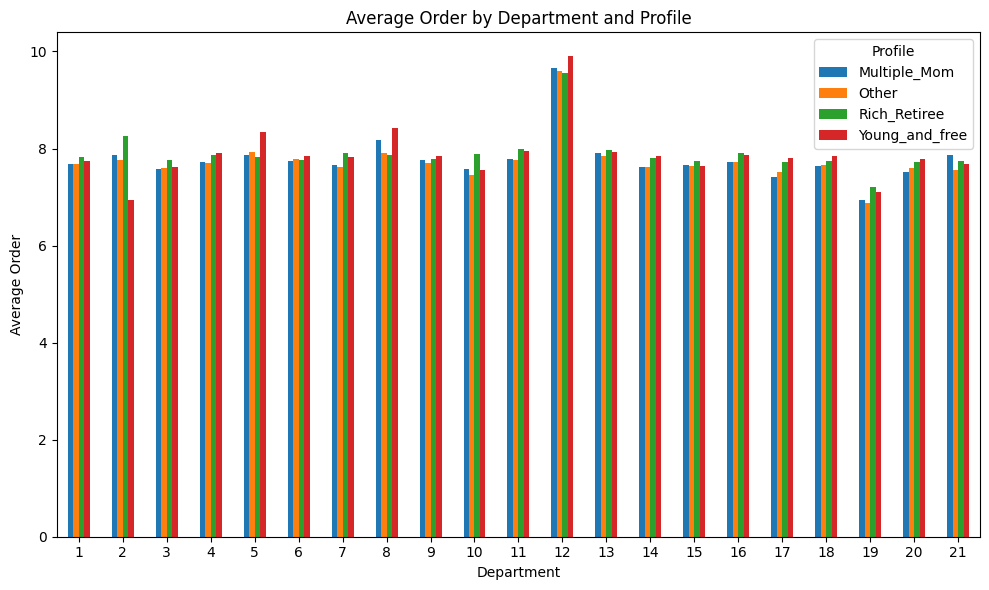

In [64]:
#A lot of departments, but try with all to start with:

# Group and reshape
bar_department_profile = (
    df_goodcusts
    .groupby(['department_id', 'Profile'])['average_order']
    .mean()
    .unstack('Profile')   # Make Profile into columns
)

# Plot
ax = bar_department_profile.plot(
    kind='bar',
    figsize=(10,6)
)

# Beautify
plt.title("Average Order by Department and Profile")
plt.ylabel("Average Order")
plt.xlabel("Department")
plt.legend(title="Profile")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

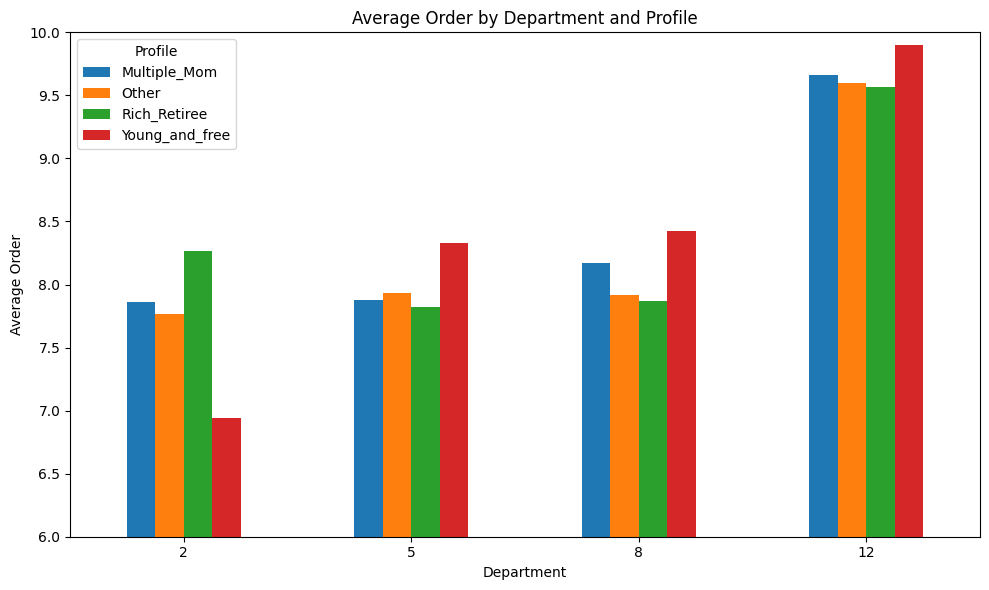

In [66]:
#Interesting departments look like: 2, 5, 8, 12
#produce a chart just with them

# Group and reshape
bar_department_profile_four = (
    df_goodcusts
    .groupby(['department_id', 'Profile'])['average_order']
    .mean()
    .unstack('Profile')
)

# Filter to selected departments
selected_departments = [2, 5, 8, 12]
bar_department_profile = bar_department_profile.loc[selected_departments]

# Plot
ax = bar_department_profile.plot(
    kind='bar',
    figsize=(10,6)
)

# Beautify
plt.title("Average Order by Department and Profile")
plt.ylabel("Average Order")
plt.xlabel("Department")
plt.legend(title="Profile")
plt.xticks(rotation=0)

# Force y-axis range
plt.ylim(6, 10)
plt.tight_layout()
plt.show()

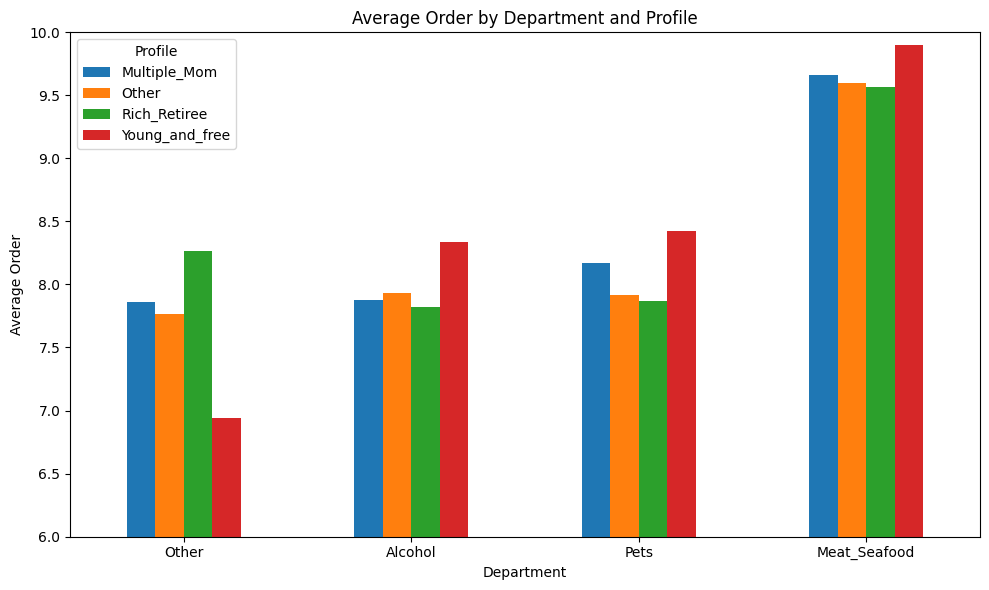

In [68]:
#Reviewing the departments .csv, we know that
# 2 = Other
# 5 = alcohol
# 8 = pets
# 12 = meat seafood
#Want to relabel the chart like that

# Group and reshape
bar_department_profile = (
    df_goodcusts
    .groupby(['department_id', 'Profile'])['average_order']
    .mean()
    .unstack('Profile')
)

# Filter to selected departments
selected_departments = [2, 5, 8, 12]
bar_department_profile = bar_department_profile.loc[selected_departments]

# Map department IDs to names
department_names = {
    2: "Other",
    5: "Alcohol",
    8: "Pets",
    12: "Meat_Seafood"
}
bar_department_profile.index = bar_department_profile.index.map(department_names)

# Plot
ax = bar_department_profile.plot(
    kind='bar',
    figsize=(10,6)
)

# Beautify
plt.title("Average Order by Department and Profile")
plt.ylabel("Average Order")
plt.xlabel("Department")
plt.legend(title="Profile")
plt.xticks(rotation=0)
plt.ylim(6, 10)
plt.tight_layout()
plt.show()

In [69]:
# Save to a specific folder in Drive
plt.savefig('/content/drive/My Drive/bar_dept_profile.png')

<Figure size 640x480 with 0 Axes>

(Another way to do this would have been to merge the Department and df_goodcusts dataframes - if doing this more than omce, would be the best way)

This shows us that:

Rich Retirees spend more on "Other" - would need to find out what they are!

Young and Free spend more on Alcohol

Multiple Mom and Young And Free spend more on pets

Meet and Seafood gets the most spend from all our profiles

**Export dataframe**

In [71]:
#Export to drive#

df_goodcusts.to_pickle('/content/drive/MyDrive/4.10_pt1_GoodCusts.pkl')